In [97]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

#functions
import wrangle as wr
import explore as exp
import model as mo


warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


## Acquire Data
Read zillow data from MySQL using the get_new_zillow_data() function in wrangle.py

In [2]:
df = wr.get_new_zillow_data()

In [3]:
#inspect
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


### Introduction to the data

learn about it's size, attributes, and components.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
#check for blanks/nulls
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [6]:
def handle_nulls(df):    
    # We keep most of the data after dropping nulls
    # round(df.dropna().shape[0] / df.shape[0], 4) returned .9941
    df = df.dropna()
    return df

In [7]:
df = wr.handle_nulls(df)

In [8]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

###  optimize data types, clean, handle outliers

In [9]:
def optimize_types(df):
    # Convert some columns to integers
    # fips, yearbuilt, and bedrooms can be integers
    df["fips"] = df["fips"].astype(str)
    df["yearbuilt"] = df["yearbuilt"].astype(int)
    df["bedroomcnt"] = df["bedroomcnt"].astype(int)    
    df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].astype(int)
    df["calculatedfinishedsquarefeet"] = df["calculatedfinishedsquarefeet"].astype(int)
    return df

In [10]:
df = wr.optimize_types(df)

In [11]:
#what about the outliers
df.bedroomcnt.describe(), df.bathroomcnt.describe(), df.calculatedfinishedsquarefeet.describe(),df.taxvaluedollarcnt.describe(),df.yearbuilt.describe()

(count    2.140235e+06
 mean     3.301419e+00
 std      9.325998e-01
 min      0.000000e+00
 25%      3.000000e+00
 50%      3.000000e+00
 75%      4.000000e+00
 max      2.500000e+01
 Name: bedroomcnt, dtype: float64,
 count    2.140235e+06
 mean     2.240352e+00
 std      9.905489e-01
 min      0.000000e+00
 25%      2.000000e+00
 50%      2.000000e+00
 75%      3.000000e+00
 max      3.200000e+01
 Name: bathroomcnt, dtype: float64,
 count    2.140235e+06
 mean     1.863194e+03
 std      1.221754e+03
 min      1.000000e+00
 25%      1.258000e+03
 50%      1.623000e+03
 75%      2.208000e+03
 max      9.525760e+05
 Name: calculatedfinishedsquarefeet, dtype: float64,
 count    2.140235e+06
 mean     4.606416e+05
 std      6.771576e+05
 min      2.200000e+01
 25%      1.891660e+05
 50%      3.282960e+05
 75%      5.346060e+05
 max      9.018846e+07
 Name: taxvaluedollarcnt, dtype: float64,
 count    2.140235e+06
 mean     1.960968e+03
 std      2.215056e+01
 min      1.801000e+03
 25%  

<AxesSubplot:xlabel='bedroomcnt'>

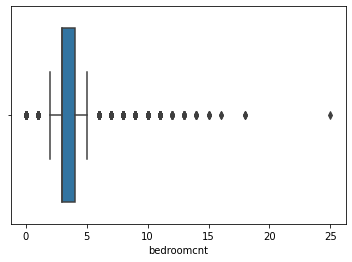

In [12]:
#visualize outliers
sns.boxplot(x='bedroomcnt', data=df)

<AxesSubplot:xlabel='bathroomcnt'>

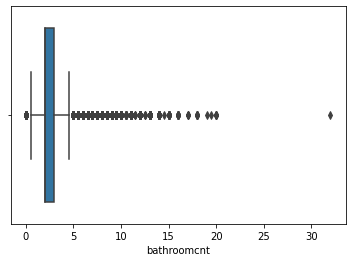

In [13]:
#visualize outliers
sns.boxplot(x='bathroomcnt', data=df)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

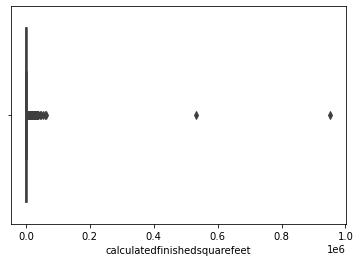

In [14]:
#visualize outliers
sns.boxplot(x='calculatedfinishedsquarefeet', data=df)

<AxesSubplot:xlabel='taxvaluedollarcnt'>

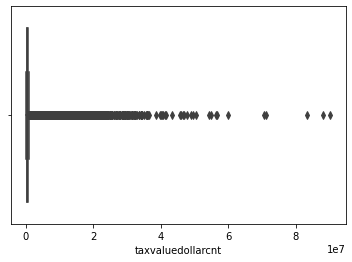

In [15]:
#visualize outliers
sns.boxplot(x='taxvaluedollarcnt', data=df)

<AxesSubplot:xlabel='yearbuilt'>

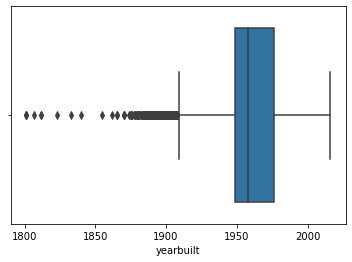

In [16]:
#visualize outliers
sns.boxplot(x='yearbuilt', data=df)

In [17]:
#looks like we can manually trim the data so as to remove the outliers skewing the data
#homes with more that 6 bedroom, more than 6 bathrooms, with less than 15000 sq ft, and less than 1500000 taxvaluedollarcnt

In [18]:
def handle_outliers(df):
    """Manually handle outliers that do not represent properties likely for 99% of buyers and zillow visitors"""
    df = df[df.bathroomcnt <= 6]
    
    df = df[df.bedroomcnt <= 6]

    df = df[df.taxvaluedollarcnt < 1_500_000]
    
    df.drop(df.loc[df.calculatedfinishedsquarefeet >15000].index, inplace=True)

    df.drop(df.loc[df['bedroomcnt']==0].index, inplace=True)
    
    df.drop(df.loc[df['bathroomcnt']==0].index, inplace=True)

    return df

In [19]:
df = wr.handle_outliers(df)

<AxesSubplot:xlabel='taxvaluedollarcnt'>

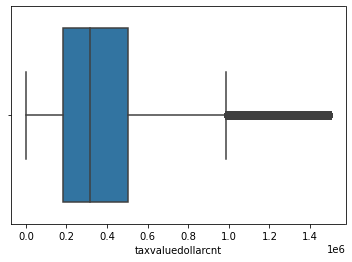

In [20]:
#inspect
sns.boxplot(x='taxvaluedollarcnt', data=df)

<AxesSubplot:xlabel='bathroomcnt'>

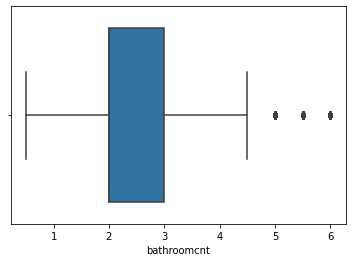

In [21]:
#inspect
sns.boxplot(x='bathroomcnt', data=df)

<AxesSubplot:xlabel='bedroomcnt'>

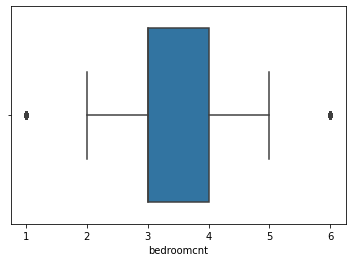

In [22]:
#inspect
sns.boxplot(x='bedroomcnt', data=df)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

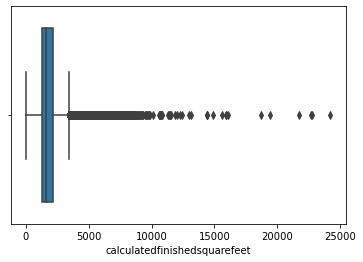

In [23]:
#visualize outliers
sns.boxplot(x='calculatedfinishedsquarefeet', data=df)

In [24]:
df.drop(df.loc[df.calculatedfinishedsquarefeet >15000].index, inplace=True)

### feature engineering and adjustment


In [25]:
    #new column total bill divided by size
df['cost_per_sqft'] = (df['taxvaluedollarcnt']/df['calculatedfinishedsquarefeet']).round(2)

    #avg sqft per number of rooms (bedroom+bathroom)
df['sqft_room_ratio'] = (df['calculatedfinishedsquarefeet']/(df['bedroomcnt']+df['bathroomcnt'])).round(2)

    #dummy encode fips
dummies = pd.get_dummies(df.fips)
df = pd.concat([df,dummies],axis=1)

In [26]:
#rename columns for ease of use
df=df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "sqft","taxvaluedollarcnt": "home_value"})

In [27]:
df

,bedrooms,bathrooms,sqft,home_value,yearbuilt,taxamount,fips,cost_per_sqft,sqft_room_ratio,6037.0,6059.0,6111.0
4,4,2.0,3633,296425,2005,6941.39,6037.0,81.59,605.50,1,0,0
6,3,4.0,1620,847770,2011,10244.94,6037.0,523.31,231.43,1,0,0
7,3,2.0,2077,646760,1926,7924.68,6037.0,311.39,415.40,1,0,0
18,3,1.0,1244,169471,1950,2532.88,6037.0,136.23,311.00,1,0,0
19,3,2.0,1300,233266,1950,3110.99,6037.0,179.44,260.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2152856,4,4.0,4375,422400,2015,13877.56,6037.0,96.55,546.88,1,0,0
2152858,4,3.0,2262,960756,2015,13494.52,6059.0,424.74,323.14,0,1,0
2152859,4,4.5,3127,536061,2014,6244.16,6059.0,171.43,367.88,0,1,0
2152861,3,2.5,1974,424353,2015,5302.70,6059.0,214.97,358.91,0,1,0


### Split  wrangled, cleaned, and prepped data
Using four functions tied to each other in wrangle.py file:

optimize_types(df):
handle_outliers(df)
split_zillow(df):





In [170]:
train, validate, test = wr.split(df, stratify_by=None)

In [171]:
train.shape, validate.shape, test.shape

((1153611, 12), (494406, 12), (412005, 12))

In [172]:
#scale data using scale_zillow function

In [173]:
train_scaled, validate_scaled, test_scaled = wr.scale_zillow(train, validate, test)

In [174]:
train_scaled.shape, validate_scaled.shape, test_scaled.shape

((1153611, 12), (494406, 12), (412005, 12))

### explore data

list categoricals and quantitative features

<AxesSubplot:>

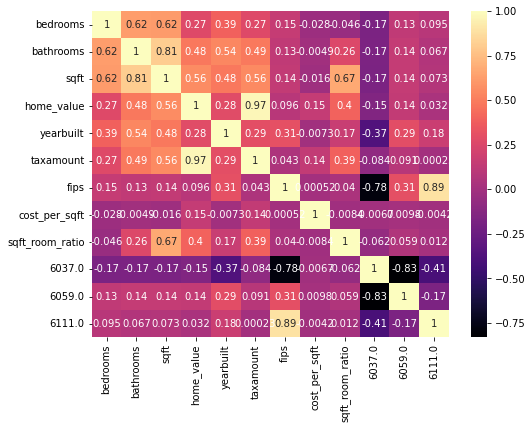

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(train_scaled.corr(), cmap='magma', annot=True)


Heat Map Takeaways:

high correlations between bedrooms, bathrooms, sqft, and sqft_room_ratio

count    1.153611e+06
mean     3.801968e+05
std      2.727847e+05
min      2.200000e+01
25%      1.844220e+05
50%      3.180890e+05
75%      5.047795e+05
max      1.499988e+06
Name: home_value, dtype: float64

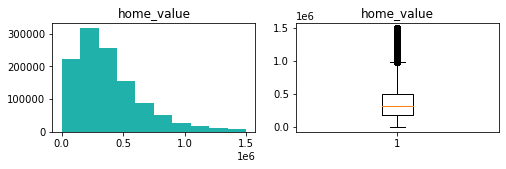

In [146]:
    descriptive_stats = train['home_value'].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train['home_value'], color='lightseagreen')
    p = plt.title('home_value')

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train['home_value'])
    p = plt.title('home_value')
    descriptive_stats

count    1.153611e+06
mean     3.801968e+05
std      2.727847e+05
min      2.200000e+01
25%      1.844220e+05
50%      3.180890e+05
75%      5.047795e+05
max      1.499988e+06
Name: home_value, dtype: float64

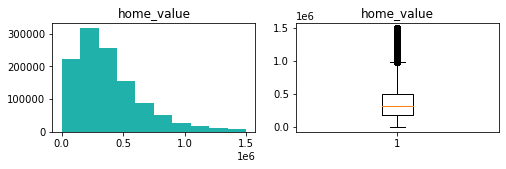

In [147]:
    descriptive_stats = train['home_value'].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train['home_value'], color='lightseagreen')
    p = plt.title('home_value')

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train['home_value'])
    p = plt.title('home_value')
    descriptive_stats

count    1.153611e+06
mean     1.774120e+03
std      7.472579e+02
min      1.000000e+00
25%      1.248000e+03
50%      1.599000e+03
75%      2.132000e+03
max      1.444400e+04
Name: sqft, dtype: float64

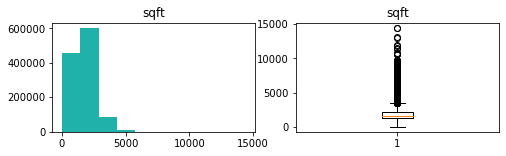

In [148]:
    descriptive_stats = train['sqft'].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train['sqft'], color='lightseagreen')
    p = plt.title('sqft')

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train['sqft'])
    p = plt.title('sqft')
    descriptive_stats

count    1.153611e+06
mean     3.268195e+00
std      8.734664e-01
min      1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      6.000000e+00
Name: bedrooms, dtype: float64

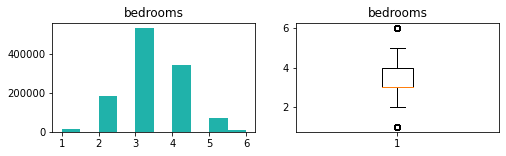

In [149]:
    descriptive_stats = train['bedrooms'].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train['bedrooms'], color='lightseagreen')
    p = plt.title('bedrooms')

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train['bedrooms'])
    p = plt.title('bedrooms')
    descriptive_stats

count    1.153611e+06
mean     2.164983e+00
std      8.441589e-01
min      5.000000e-01
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: bathrooms, dtype: float64

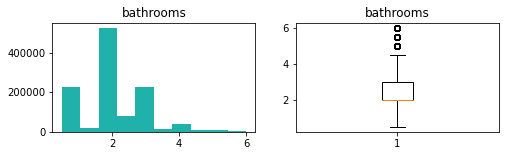

In [150]:
    descriptive_stats = train['bathrooms'].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train['bathrooms'], color='lightseagreen')
    p = plt.title('bathrooms')

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train['bathrooms'])
    p = plt.title('bathrooms')
    descriptive_stats

count    1.153611e+06
mean     2.189776e+02
std      6.956626e+02
min      1.000000e-02
25%      1.223500e+02
50%      1.976700e+02
75%      2.894400e+02
max      6.097510e+05
Name: cost_per_sqft, dtype: float64

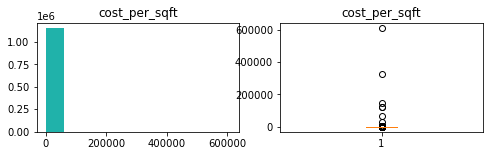

In [151]:
    descriptive_stats = train['cost_per_sqft'].describe()
    plt.figure(figsize=(8,2))

    p = plt.subplot(1, 2, 1)
    p = plt.hist(train['cost_per_sqft'], color='lightseagreen')
    p = plt.title('cost_per_sqft')

    # second plot: box plot
    p = plt.subplot(1, 2, 2)
    p = plt.boxplot(train['cost_per_sqft'])
    p = plt.title('cost_per_sqft')
    descriptive_stats

count    1.153611e+06
mean     3.238696e+02
std      8.037433e+01
min      2.500000e-01
25%      2.666700e+02
50%      3.101200e+02
75%      3.662500e+02
max      4.374330e+03
Name: sqft_room_ratio, dtype: float64

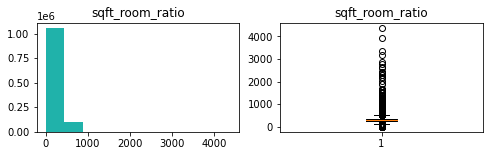

In [152]:
descriptive_stats = train['sqft_room_ratio'].describe()
plt.figure(figsize=(8,2))

p = plt.subplot(1, 2, 1)
p = plt.hist(train['sqft_room_ratio'], color='lightseagreen')
p = plt.title('sqft_room_ratio')

# second plot: box plot
p = plt.subplot(1, 2, 2)
p = plt.boxplot(train['sqft_room_ratio'])
p = plt.title('sqft_room_ratio')
descriptive_stats

In [153]:
def jointplot(x, y, df):
    '''
    jointplot will take in a feature("x") and a target("y") 
    and plot a corresponding scatter and distribution.
    '''
    
    p = sns.jointplot(x=x, y=y, data=df, kind="hex", color="mediumslateblue")
    
    return p

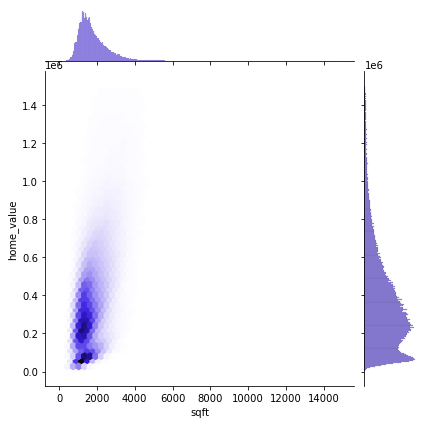

In [154]:
sns.jointplot(x='sqft', y='home_value', data=df, kind="hex", color="mediumslateblue")

In [155]:
#This graph tells me a majority of homes are in the 
#bottom 20% of square feet and bottom 45% of home_value. 

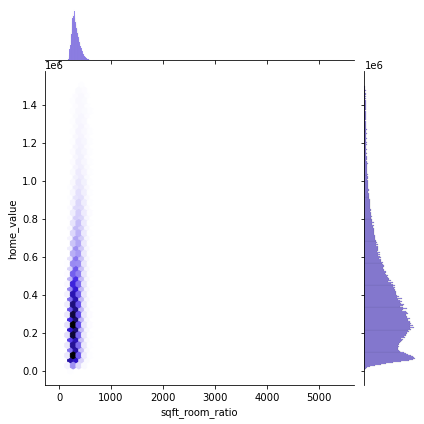

In [156]:
sns.jointplot(x='sqft_room_ratio', y='home_value', data=df, kind="hex", color="mediumslateblue")


Hypothesis Testing

using a correlation_test function listed below to test my hypotheses as they are all concerning quantitative data.

In [157]:
def correlation_test(Ho, Ha, x, y):
    '''
    correlation_test will take in two arguments and 
    - plot a scatterplot of them
    - test the correlation
    return: the correlation coefficient, p, and if there is a linear relationship.
    '''
    
    splot = plt.scatter(x, y)
    
    null_hypothesis = Ho
    alternative_hypothesis = Ha
    
    confidence_level = .95
    a = 1 - confidence_level 
    
    corr, p = stats.pearsonr(x, y)

    if p < a:
        print(f"Reject null statment: {null_hypothesis}")
        print("There is a linear relationship.")
        if 0 < corr < .6:
            print("there is a positive weak one.")
        elif .6 < corr < 1:
            print("That is a stronger positive correlation.")
        elif -.6 < corr < 0:
            print("there is a negative weak one.")
        elif -1 < corr < -.6:
            print("That is a stronger negative correlation.")
        
    else : 
        print("Fail to reject the null hypothesis.")
        
    print(f"""
    Correlation Coefficient: {corr}
    p: {p}
    
    """)
    return splot

Test: There is a relationship between square footage and home value.

In [158]:
#assign your null hypothesis
Ho = "No correlation between square footage and home value."

#and your alternative hypothesis
Ha = "There IS a correlation between square footage and home value."

#the feature you are testing
x1 = train_scaled.sqft

#against your target
y1 = train_scaled.home_value

Reject null statment: No correlation between square footage and home value.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.5585526497929323
    p: 0.0
    
    


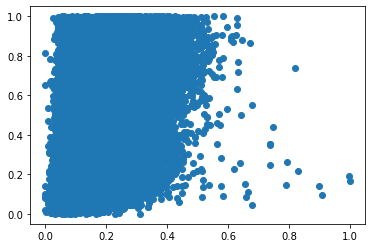

In [159]:
correlation_test(Ho, Ha, x1, y1)

Test: There is a weak correlation between number of bathrooms and home value.

In [160]:
Ho = "No correlation between number of bathrooms and home value."
Ha = "There IS a correlation between bathrooms and home value."
x2 = train_scaled.bathrooms
y2 = train_scaled.home_value

Reject null statment: No correlation between number of bathrooms and home value.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.484619095836773
    p: 0.0
    
    


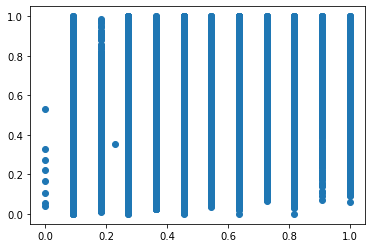

In [161]:
correlation_test(Ho, Ha, x2, y2)

Test: There is a relationship between number of bedrooms and home value.

In [162]:
Ho = "No correlation between number of bedrooms and home value."
Ha = "There IS a correlation between bedrooms and home value."
x3 = train_scaled.bedrooms
y3 = train_scaled.home_value

Reject null statment: No correlation between number of bedrooms and home value.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.2670979461724933
    p: 0.0
    
    


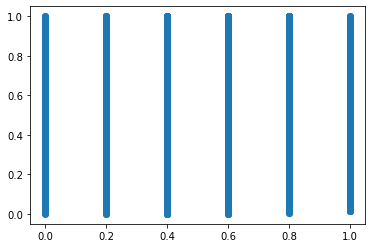

In [163]:
correlation_test(Ho, Ha, x3, y3)

Test: There is a relationship between square footage per room ratio and home value.

In [164]:
Ho = "No correlation between square footage per room ratio and home value."
Ha = "There IS a correlation between square footage per room ratio and home value."
x4 = train_scaled.sqft_room_ratio
y4 = train_scaled.home_value

Reject null statment: No correlation between square footage per room ratio and home value.
There is a linear relationship.
there is a positive weak one.

    Correlation Coefficient: 0.39658735460696176
    p: 0.0
    
    


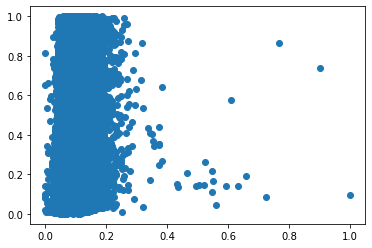

In [165]:
correlation_test(Ho, Ha, x4, y4)

### Evaluate Data

In [112]:
import model_zillow as mz

In [175]:
train

,bedrooms,bathrooms,sqft,home_value,yearbuilt,taxamount,fips,cost_per_sqft,sqft_room_ratio,6037.0,6059.0,6111.0
1088045,3,2.0,1068,47535,1959,567.16,6111.0,44.51,213.60,0,0,1
1457900,3,2.0,1542,847768,1941,9306.24,6037.0,549.78,308.40,1,0,0
115397,3,2.5,2174,306182,1964,3762.70,6059.0,140.84,395.27,0,1,0
506301,3,2.0,1359,156270,1973,1675.46,6111.0,114.99,271.80,0,0,1
641634,3,2.0,1200,79986,1977,1292.17,6037.0,66.66,240.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
463215,4,3.0,2029,328179,1994,3465.88,6111.0,161.74,289.86,0,0,1
1793012,3,1.0,1083,217072,1944,2819.76,6037.0,200.44,270.75,1,0,0
136986,3,2.0,2463,438091,1956,5110.96,6059.0,177.87,492.60,0,1,0
988610,3,2.5,1750,71543,1963,1104.14,6059.0,40.88,318.18,0,1,0


In [ ]:
#separate target from features that will be used and scale

In [176]:
X_train = train.drop(columns=['home_value','yearbuilt','taxamount','fips','yearbuilt','cost_per_sqft','6037.0','6059.0','6111.0'])
X_validate = validate.drop(columns=['home_value','yearbuilt','taxamount','fips','yearbuilt','cost_per_sqft','6037.0','6059.0','6111.0'])
X_test = test.drop(columns=['home_value','yearbuilt','taxamount','fips','yearbuilt','cost_per_sqft','6037.0','6059.0','6111.0'])
y_train = train.home_value
y_validate = validate.home_value
y_test = test.home_value

In [177]:
X_train

,bedrooms,bathrooms,sqft,sqft_room_ratio
1088045,3,2.0,1068,213.60
1457900,3,2.0,1542,308.40
115397,3,2.5,2174,395.27
506301,3,2.0,1359,271.80
641634,3,2.0,1200,240.00
...,...,...,...,...
463215,4,3.0,2029,289.86
1793012,3,1.0,1083,270.75
136986,3,2.0,2463,492.60
988610,3,2.5,1750,318.18


In [178]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_train)

train_mms = mms.transform(X_train)

In [180]:
#Is there a mistake here?
X_train_scaled = pd.DataFrame(train_mms, columns=list(X_train.columns))

In [182]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_validate)

validate_mms = mms.transform(X_validate)

In [183]:
#Is there a mistake here?
X_validate_scaled = pd.DataFrame(validate_mms, columns=list(X_validate.columns))

In [184]:
#Assign the scaler to a variable, and fit/transform the training data
mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(X_test)

test_mms = mms.transform(X_test)

In [185]:
#Is there a mistake here?
X_test_scaled = pd.DataFrame(test_mms, columns=list(X_test.columns))

In [186]:
X_test_scaled

,bedrooms,bathrooms,sqft,sqft_room_ratio
0,0.6,0.363636,0.093689,0.043249
1,0.4,0.272727,0.083451,0.050089
2,0.4,0.272727,0.103927,0.062373
3,0.4,0.272727,0.067354,0.040431
4,0.4,0.090909,0.073079,0.054837
...,...,...,...,...
412000,0.6,0.363636,0.145215,0.067031
412001,0.2,0.090909,0.083047,0.083090
412002,0.6,0.272727,0.084529,0.042275
412003,0.2,0.090909,0.048427,0.048472


In [193]:
# from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=4)

# find the top 8 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [194]:
f_feature

['bedrooms', 'bathrooms', 'sqft', 'sqft_room_ratio']

In [195]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, n_features_to_select=4)

# fit the data using RFE
rfe.fit(X_train,y_train)  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = X_train.iloc[:,feature_mask].columns.tolist()

In [196]:
rfe_feature

['bedrooms', 'bathrooms', 'sqft', 'sqft_room_ratio']

### Modeling

In [197]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [198]:
#preview
y_train.head()

,home_value
1088045,47535
1457900,847768
115397,306182
506301,156270
641634,79986


####  Identify Baseline

In [199]:
# 1. compute pred_median
home_value_baseline_median = y_train['home_value'].median()
y_train['home_value_baseline_median'] = home_value_baseline_median
y_validate['home_value_baseline_median'] = home_value_baseline_median

# 2. compute pred_mean
home_value_baseline_mean = y_train['home_value'].mean()
y_train['home_value_baseline_mean'] = home_value_baseline_mean
y_validate['home_value_baseline_mean'] = home_value_baseline_mean

#check to see which is better
y_train.head()

,home_value,home_value_baseline_median,home_value_baseline_mean
1088045,47535,318089.0,380196.833903
1457900,847768,318089.0,380196.833903
115397,306182,318089.0,380196.833903
506301,156270,318089.0,380196.833903
641634,79986,318089.0,380196.833903


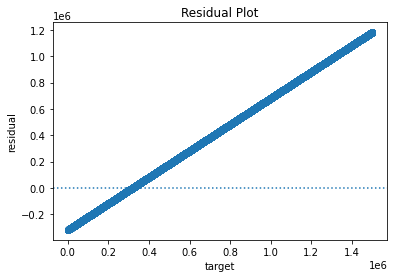

In [200]:
mz.plot_residuals(y_train.home_value, y_train.home_value_baseline_median)

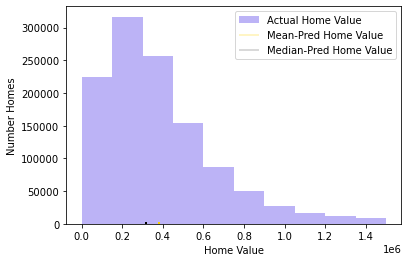

In [201]:
# plot to visualize actual vs predicted.
#median value performs better

plt.hist(y_train.home_value, color='mediumslateblue', alpha=.5, label="Actual Home Value")
plt.vlines(y_train.home_value_baseline_mean, 0, 3000, color='gold', alpha=.3, label="Mean-Pred Home Value")
plt.vlines(y_train.home_value_baseline_median, 0, 3000, color='black', alpha=.2, label="Median-Pred Home Value")
plt.xlabel("Home Value")
plt.ylabel("Number Homes")
plt.legend()
plt.show()

In [202]:
# 3. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.home_value, y_train.home_value_baseline_median) ** (0.5)
rmse_validate = mean_squared_error(y_validate.home_value, y_validate.home_value_baseline_median) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)


      BASELINE:
      
      RMSE using Median
      Train/In-Sample: 279765.61
      Validate/Out-of-Sample: 279423.34
        



### Train / Validate
Modeling: LinearRegression (OLS)

In [203]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm)**(0.5)

# predict validate
y_validate['home_value_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: {round(rmse_train_lm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 279765.61
              Validate/Out-of-Sample: 279423.34

    RMSE for OLS using LinearRegression
    
    Training/In-Sample: 223506.14
    Validation/Out-of-Sample: 223873.71



### Modeling: LassoLars

In [204]:
# create the model object

lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.home_value, y_train.home_value_pred_lars)**(0.5)

# predict validate
y_validate['home_value_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lars)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

    RMSE for LassoLars
    
    Training/In-Sample: {round(rmse_train_lars, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 279765.61
              Validate/Out-of-Sample: 279423.34
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 223506.14
                Validation/Out-of-Sample: 223873.71

    RMSE for LassoLars
    
    Training/In-Sample: 223620.16
    Validation/Out-of-Sample: 224003.92



### Modeling: TweedieRegressor (GLM)

In [205]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.home_value)

# predict train
y_train['home_value_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.home_value, y_train.home_value_pred_glm)**(0.5)

# predict validate
y_validate['home_value_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_glm)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: {round(rmse_train_glm, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 279765.61
              Validate/Out-of-Sample: 279423.34
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 223506.14
                Validation/Out-of-Sample: 223873.71

                RMSE for LassoLars
                
                Training/In-Sample: 223620.16
                Validation/Out-of-Sample: 224003.92
    
    RMSE for TweedieRegressor (GLM)
    power=1, alpha=0
    
    Training/In-Sample: 272784.56
    Validation/Out-of-Sample: 272460.67



### Modeling: PolynomialFeatures

In [206]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [207]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.home_value)

# predict train
y_train['home_value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm2)**(0.5)

# predict validate
y_validate['home_value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm2)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: {round(rmse_train_lm2, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 279765.61
              Validate/Out-of-Sample: 279423.34
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 223506.14
                Validation/Out-of-Sample: 223873.71

                RMSE for LassoLars
                
                Training/In-Sample: 223620.16
                Validation/Out-of-Sample: 224003.92
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 272784.56
                Validation/Out-of-Sample: 272460.67
                
    
    RMSE for Polynomial Regressor
    degrees=2
    
    Training/In-Sample: 222686.78
    Validation/Out-of-Sample: 223076.9



In [208]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf3.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf3.transform(X_validate)
X_test_degree3 = pf3.transform(X_test)

In [209]:
# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.home_value)

# predict train
y_train['home_value_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train_lm3 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm3)**(0.5)

# predict validate
y_validate['home_value_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate_lm3 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm3)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: {round(rmse_train_lm2, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: {round(rmse_train_lm3, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm3, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 279765.61
              Validate/Out-of-Sample: 279423.34
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 223506.14
                Validation/Out-of-Sample: 223873.71

                RMSE for LassoLars
                
                Training/In-Sample: 223620.16
                Validation/Out-of-Sample: 224003.92
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 272784.56
                Validation/Out-of-Sample: 272460.67
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: 222686.78
                Validation/Out-of-Sample: 223076.9
                
    
    RMSE for Polynomial Regressor
    degrees=3
    
    Training/In-Sample: 222

In [210]:
# make the polynomial features to get a new set of features
pf4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf4.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf4.transform(X_validate)
X_test_degree4 = pf4.transform(X_test)

In [211]:
# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train.home_value)

# predict train
y_train['home_value_pred_lm4'] = lm4.predict(X_train_degree4)

# evaluate: rmse
rmse_train_lm4 = mean_squared_error(y_train.home_value, y_train.home_value_pred_lm4)**(0.5)

# predict validate
y_validate['home_value_pred_lm4'] = lm4.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate_lm4 = mean_squared_error(y_validate.home_value, y_validate.home_value_pred_lm4)**(0.5)

print(f"""
              BASELINE:
              
              RMSE using Median
              Train/In-Sample: {round(rmse_train, 2)}
              Validate/Out-of-Sample: {round(rmse_validate, 2)}
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: {round(rmse_train_lm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}

                RMSE for LassoLars
                
                Training/In-Sample: {round(rmse_train_lars, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: {round(rmse_train_glm, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: {round(rmse_train_lm2, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}
                
                RMSE for Polynomial Regressor
                degrees=3
                
                Training/In-Sample: {round(rmse_train_lm3, 2)}
                Validation/Out-of-Sample: {round(rmse_validate_lm3, 2)}
                
    
    RMSE for Polynomial Regressor
    degrees=4
    
    Training/In-Sample: {round(rmse_train_lm4, 2)}
    Validation/Out-of-Sample: {round(rmse_validate_lm4, 2)}
""")


              BASELINE:
              
              RMSE using Median
              Train/In-Sample: 279765.61
              Validate/Out-of-Sample: 279423.34
              
                RMSE for OLS using LinearRegression
                
                Training/In-Sample: 223506.14
                Validation/Out-of-Sample: 223873.71

                RMSE for LassoLars
                
                Training/In-Sample: 223620.16
                Validation/Out-of-Sample: 224003.92
    
                RMSE for TweedieRegressor (GLM)
                power=1, alpha=0
                
                Training/In-Sample: 272784.56
                Validation/Out-of-Sample: 272460.67
                
                RMSE for Polynomial Regressor
                degrees=2
                
                Training/In-Sample: 222686.78
                Validation/Out-of-Sample: 223076.9
                
                RMSE for Polynomial Regressor
                degrees=3
             

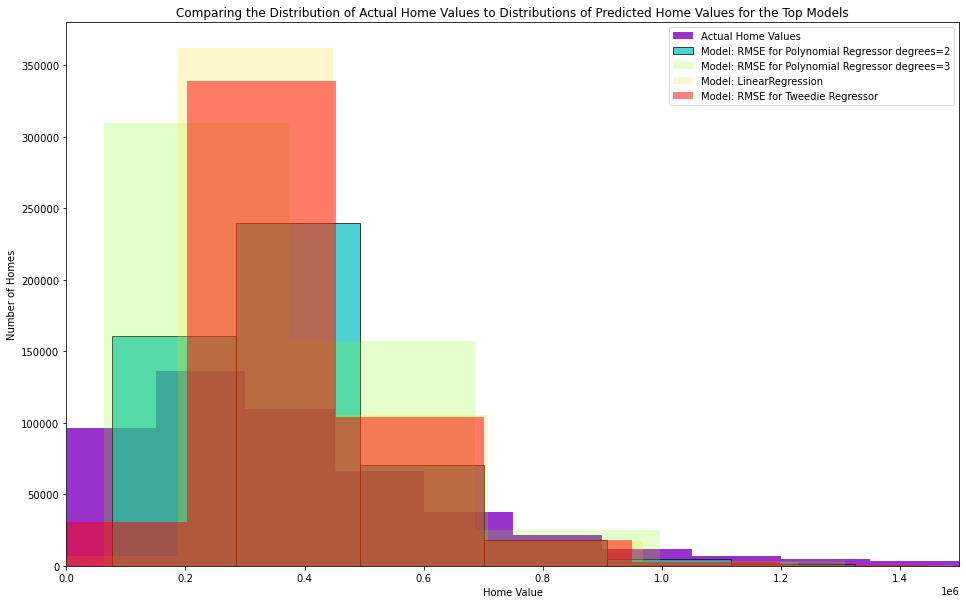

In [228]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,10))
plt.hist(y_validate.home_value, color='darkorchid', alpha=1, label="Actual Home Values")
plt.hist(y_validate.home_value_pred_lm2, color='c', alpha=.7, label="Model: RMSE for Polynomial Regressor degrees=2", ec='black')
plt.hist(y_validate.home_value_pred_lm3, color='chartreuse', alpha=.2, label="Model: RMSE for Polynomial Regressor degrees=3")
#plt.hist(y_validate.home_value_pred_lm4, color='m', alpha=.2, label="Model: RMSE for Polynomial Regressor degrees=4")
plt.hist(y_validate.home_value_pred_lm, color='gold', alpha=.2, label="Model: LinearRegression")
plt.hist(y_validate.home_value_pred_lars, color='red', alpha=.5, label="Model: RMSE for Tweedie Regressor")
plt.xlim(0, 1500000)
plt.xlabel("Home Value")
plt.ylabel("Number of Homes")
plt.title("Comparing the Distribution of Actual Home Values to Distributions of Predicted Home Values for the Top Models")
plt.legend()
plt.show()

### Test

In [229]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['home_value_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.home_value, y_test.home_value_pred_lm2)**(0.5)

print(f"""
    RMSE for Polynomial Regressor degrees=2
    
    Test/Out-of-Sample Performance: {round(rmse_test, 2)}
""")


    RMSE for Polynomial Regressor degrees=2
    
    Test/Out-of-Sample Performance: 223197.75



In [ ]:
sns.pairplot(train, kind='reg')